
# Data wrangling workshop for Neuroscience Master students - Part I

## 1) Make you code reproducible (AKA work on other machines) 


In [69]:
import os
import pandas as pd
import numpy as np
from plotnine import *
import sklearn 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


print(os.getcwd().strip('"\''))



/home/davidM/Desktop/SwitchDrive/responses


In [70]:
data = pd.read_csv("data/data.csv")
data.head()

,id,intervention,var1_ses1,var1_ses2,var2_ses1,var2_ses2,var3_ses1,var3_ses2,var4_ses1,var4_ses2,...,var10_ses1,var10_ses2,var11_ses1,var11_ses2,var12_ses1,var12_ses2,var13_ses1,var13_ses2,var14_ses1,var14_ses2
0,232,1,108,102.0,20.3,19.6,1.21,1.02,219.96,218.540,...,0.63,0.84,1.25,3.68,2.38,2.61,1.91,2.63,115.035600,117.057016
1,205,1,107,92.0,16.3,4.0,2.00,1.10,31.98,13.175,...,0.96,0.54,1.72,3.18,2.86,1.95,3.12,1.97,119.299964,121.129335
2,268,1,92,85.0,19.2,20.5,0.88,0.95,24.45,25.495,...,0.48,0.40,1.41,1.84,2.05,2.04,1.33,1.50,88.290772,88.943997
3,211,1,117,112.0,19.9,16.4,0.47,2.30,10.68,8.060,...,0.81,0.63,0.85,1.64,2.91,2.31,2.55,2.30,107.352048,108.753857
4,262,1,121,112.0,16.4,8.6,1.12,0.45,10.94,14.125,...,0.39,0.59,1.36,1.60,2.59,1.96,1.54,1.91,133.778686,134.960787


## 2) Rearrange the data 

In [71]:
var_string = list(filter(lambda x: x.endswith('ses1'), data.columns))
for i in range(len(var_string)):
    var_string[i] = var_string[i][: -5]

var_string  #getting the name of the variables


['var1',
 'var2',
 'var3',
 'var4',
 'var5',
 'var6',
 'var7',
 'var8',
 'var9',
 'var10',
 'var11',
 'var12',
 'var13',
 'var14']

In [72]:
data_long = pd.wide_to_long(data, stubnames=var_string, i=['id', 'intervention'], j='session',
                 sep='_', suffix=r'\w+').reset_index()

data_long['intervention'] = data_long['intervention'].astype(object)

#wide to long format
data_long.head()

,id,intervention,session,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14
0,232,1,ses1,108.0,20.3,1.21,219.960,1.49,0.553741,1.22000,5.8,5.232889,0.63,1.25,2.38,1.91,115.035600
1,232,1,ses2,102.0,19.6,1.02,218.540,1.50,1.439659,0.81975,5.3,4.616889,0.84,3.68,2.61,2.63,117.057016
2,205,1,ses1,107.0,16.3,2.00,31.980,14.21,0.184776,1.26000,5.7,4.129333,0.96,1.72,2.86,3.12,119.299964
3,205,1,ses2,92.0,4.0,1.10,13.175,5.04,0.180839,0.80148,4.8,0.853333,0.54,3.18,1.95,1.97,121.129335
4,268,1,ses1,92.0,19.2,0.88,24.450,0.00,0.000000,0.00000,5.9,5.034667,0.48,1.41,2.05,1.33,88.290772


In [73]:
data_longer = pd.melt(data_long, id_vars=['id', 'intervention', 'session'], value_vars=var_string,var_name='var', value_name='measure')
data_longer.head()

,id,intervention,session,var,measure
0,232,1,ses1,var1,108.0
1,232,1,ses2,var1,102.0
2,205,1,ses1,var1,107.0
3,205,1,ses2,var1,92.0
4,268,1,ses1,var1,92.0


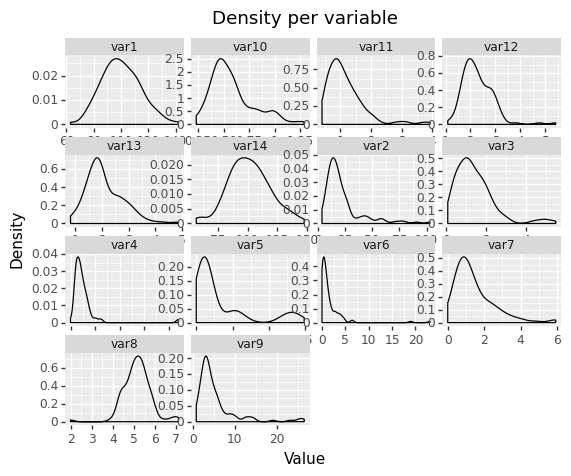

<ggplot: (8787010019401)>

In [74]:
#density plots
ggplot(data_longer) + geom_density(aes( x='measure')) + \
facet_wrap(['var'], scales = "free") + \
labs(title = "Density per variable")+ \
  ylab("Density") + xlab('Value')

In [75]:
#corrplot
corr = data_long[data_long.columns[3:]].corr()
corr.style.background_gradient(cmap='coolwarm')

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14
var1,1.000000,0.262212,0.129814,0.127907,0.022572,0.070653,0.002583,0.268413,0.279079,-0.024461,0.219915,0.000715,-0.070571,0.735625
var2,0.262212,1.000000,0.112174,0.005008,0.148734,0.044538,0.016040,0.435592,0.985805,-0.038246,0.077379,-0.040515,-0.103252,0.110516
var3,0.129814,0.112174,1.000000,-0.040157,0.267349,-0.057770,0.068363,0.091031,0.126914,0.310828,0.025925,0.260359,0.235652,0.087298
var4,0.127907,0.005008,-0.040157,1.000000,-0.024388,0.075879,-0.092613,0.079899,0.005140,0.011745,0.253459,-0.024171,-0.046678,0.172831
var5,0.022572,0.148734,0.267349,-0.024388,1.000000,-0.068265,0.141559,0.062968,0.189018,0.251378,-0.012759,0.299543,0.331585,-0.037112
var6,0.070653,0.044538,-0.057770,0.075879,-0.068265,1.000000,-0.039616,-0.027110,0.034254,-0.068096,-0.057388,-0.108657,-0.069174,-0.055165
var7,0.002583,0.016040,0.068363,-0.092613,0.141559,-0.039616,1.000000,-0.066379,0.004352,0.058578,-0.197504,-0.004298,0.102619,-0.149084
var8,0.268413,0.435592,0.091031,0.079899,0.062968,-0.027110,-0.066379,1.000000,0.536489,0.088180,0.227797,0.136362,0.086795,0.235316
var9,0.279079,0.985805,0.126914,0.005140,0.189018,0.034254,0.004352,0.536489,1.000000,-0.008630,0.114875,-0.016615,-0.077887,0.125792
var10,-0.024461,-0.038246,0.310828,0.011745,0.251378,-0.068096,0.058578,0.088180,-0.008630,1.000000,0.005085,0.663157,0.836511,-0.026437


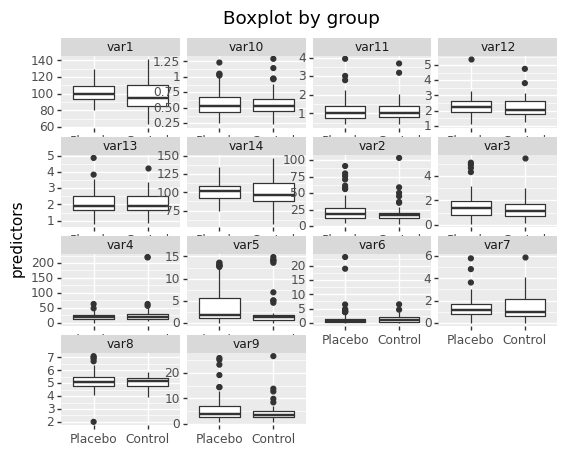

<ggplot: (8787017475675)>

In [76]:
#boxplot
ggplot(data_longer)+ \
  geom_boxplot(aes(x='intervention', y='measure'))+ \
    facet_wrap(['var'], scales = "free") + \
  scale_x_discrete(labels=["Placebo", "Control"]) + \
    labs(title = "Boxplot by group")+ \
    ylab("predictors") + xlab('')


In [77]:
#scaling
scaler = preprocessing.StandardScaler() # from sklearn
data_long[var_string] = scaler.fit_transform(data_long[var_string])
data_long.head()

,id,intervention,session,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14
0,232,1,ses1,0.562069,-0.129496,-0.217896,6.998226,-0.435543,-0.345061,-0.190255,1.011431,-0.030455,0.234508,0.149352,0.163159,-0.263276,0.783551
1,232,1,ses2,0.137033,-0.169458,-0.410122,6.947260,-0.433141,-0.038428,-0.550581,0.238363,-0.157298,1.211370,4.101998,0.538116,0.767119,0.900030
2,205,1,ses1,0.491230,-0.357850,0.581361,0.251235,2.619847,-0.472767,-0.154245,0.856817,-0.257692,1.769577,0.913855,0.945677,1.468361,1.029273
3,205,1,ses2,-0.571360,-1.060039,-0.329184,-0.423715,0.417180,-0.474129,-0.567029,-0.534705,-0.932263,-0.184147,3.288696,-0.537846,-0.177410,1.134686
4,268,1,ses1,-0.571360,-0.192293,-0.551762,-0.019032,-0.793446,-0.536721,-1.288562,1.166044,-0.071272,-0.463250,0.409608,-0.374822,-1.093317,-0.757544
